In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
card1=cv2.imread("images\cards1.jpg")
card2=cv2.imread("images\cards2.jpg")

In [4]:
def process_image(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    median = cv2.medianBlur(gray,75)
    canny = cv2.Canny(median,35,100)
    return canny

In [5]:
def mask_contours(img,contours):
    masked_imgs =[]
    area_thresh=100
    for contour in contours:
        if cv2.contourArea(contour) < area_thresh:
            continue
        mask = np.zeros(img.shape[:2],np.uint8)
        cv2.drawContours(mask,[contour],-1,255,-1)
        masked_img=cv2.bitwise_and(img,img,mask=mask)
        masked_imgs.append(masked_img)
    return masked_imgs


the same code works for both images

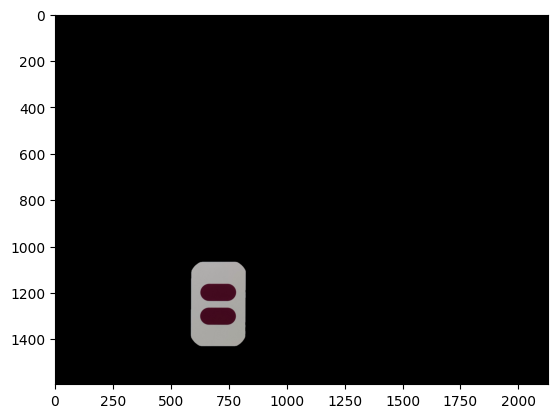

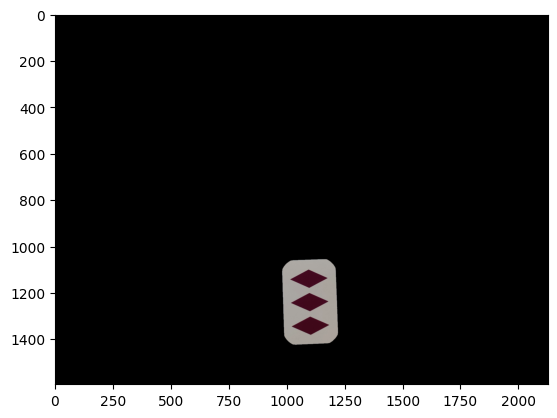

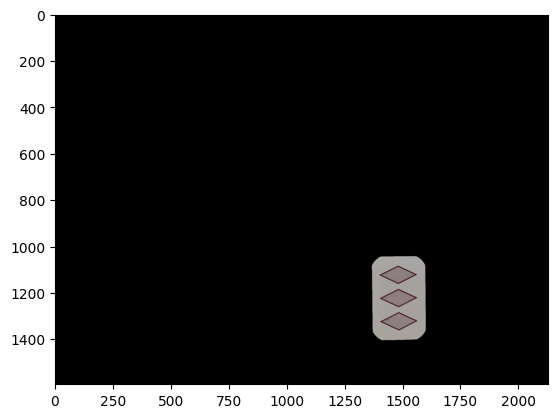

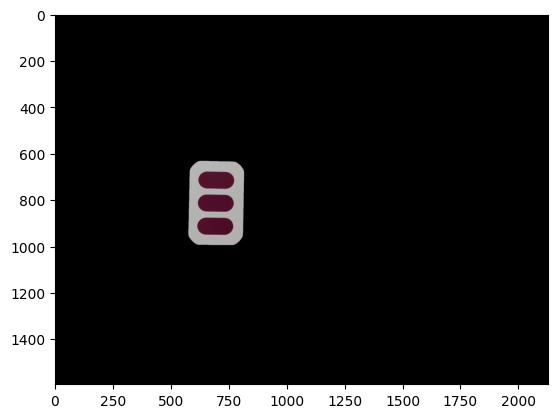

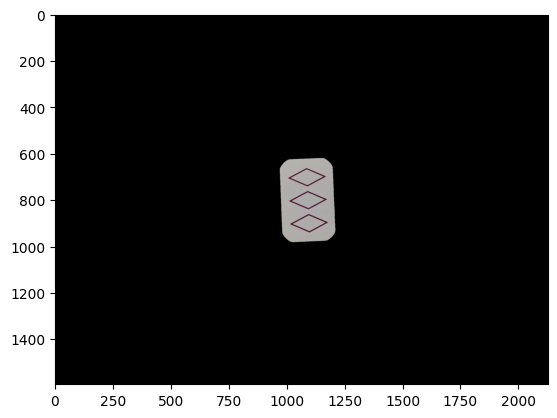

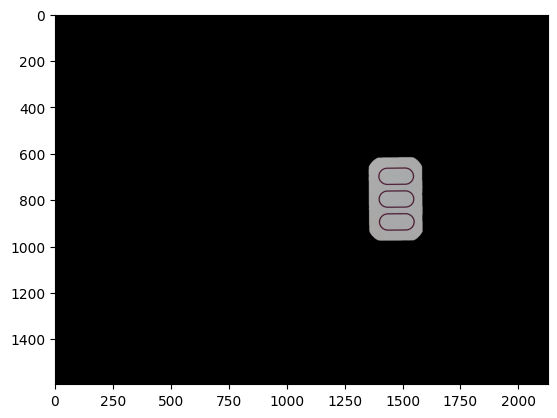

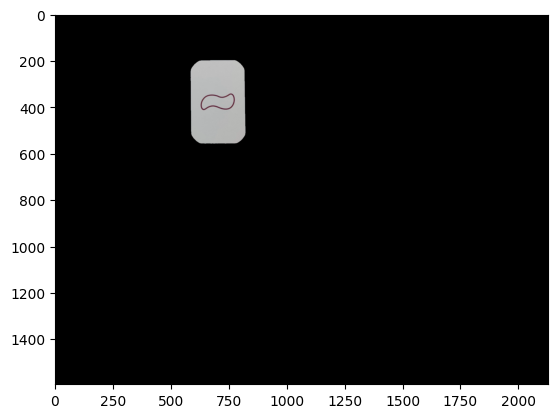

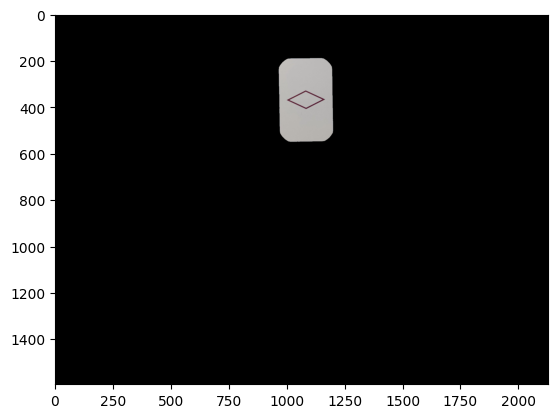

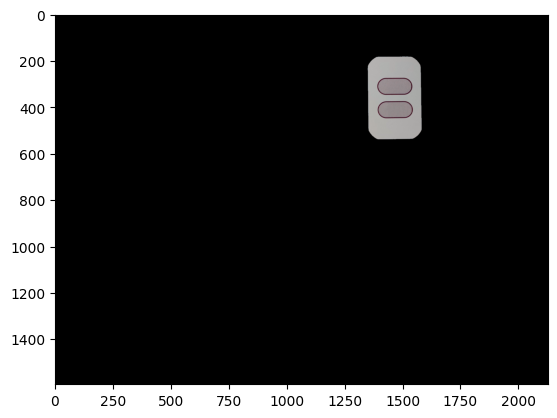

In [8]:
img = card1.copy()
# img = card2.copy()
processed_img = process_image(img)
contours, _ = cv2.findContours(processed_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
masked_imgs = mask_contours(img,contours)

for i in masked_imgs:
    plt.imshow(i,cmap="gray")
    plt.show()


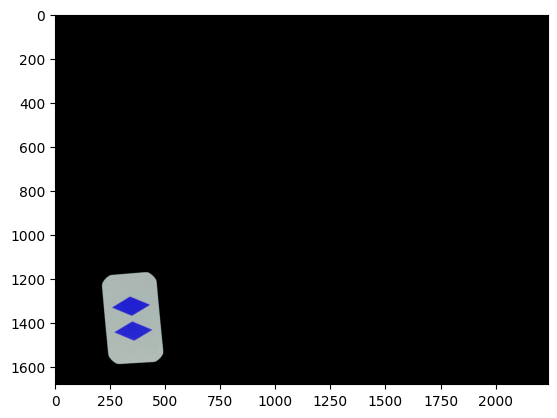

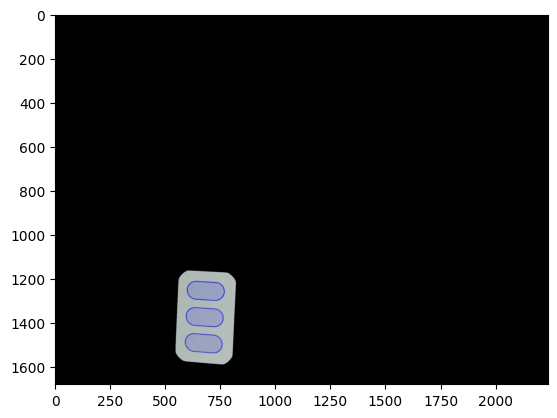

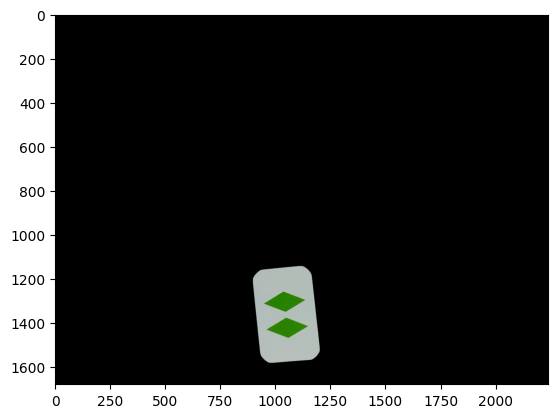

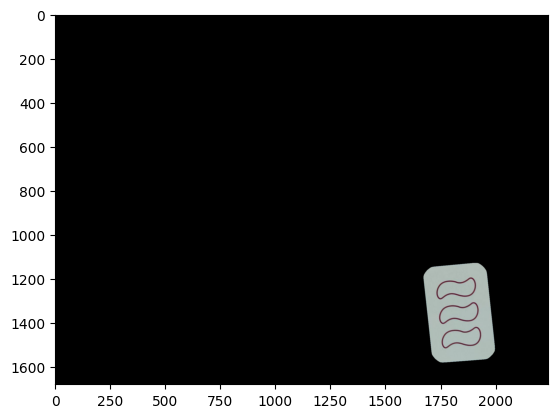

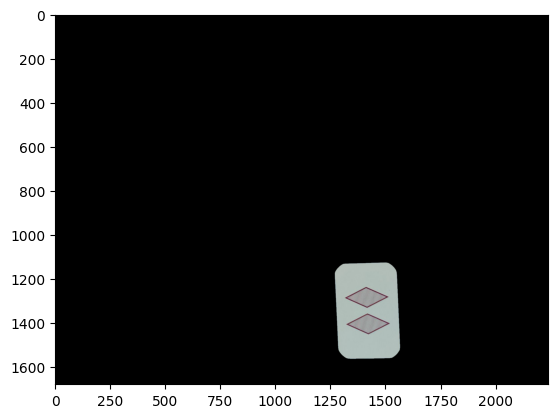

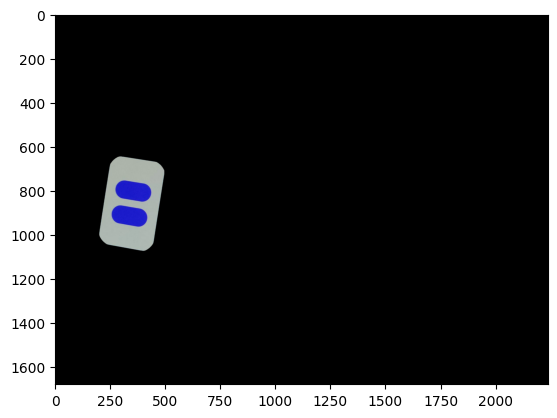

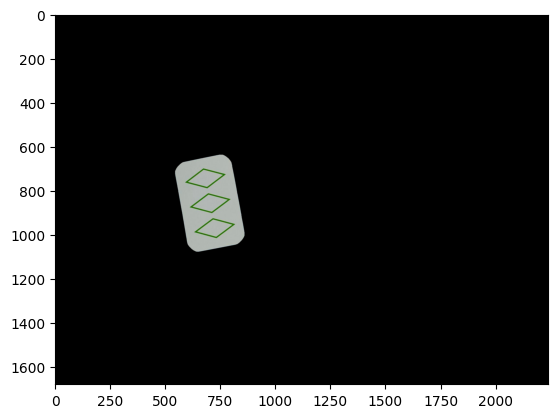

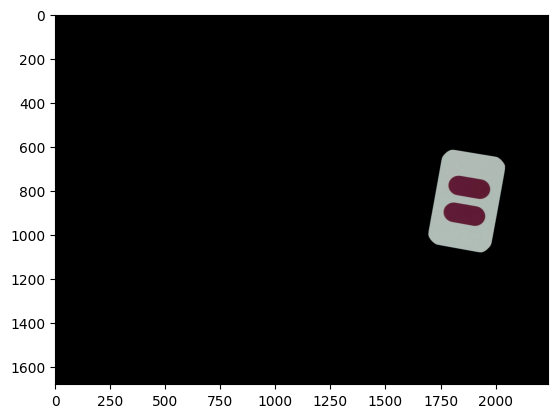

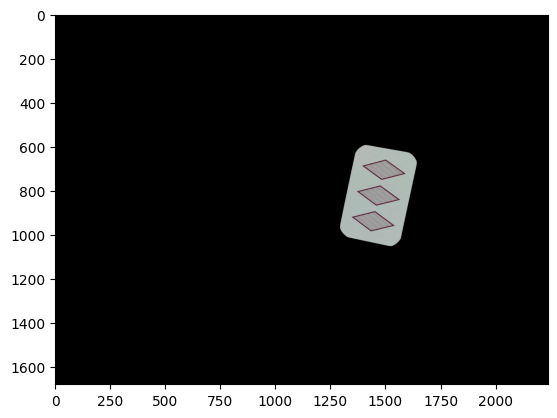

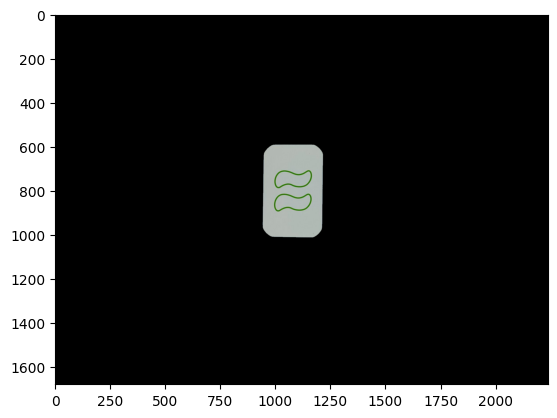

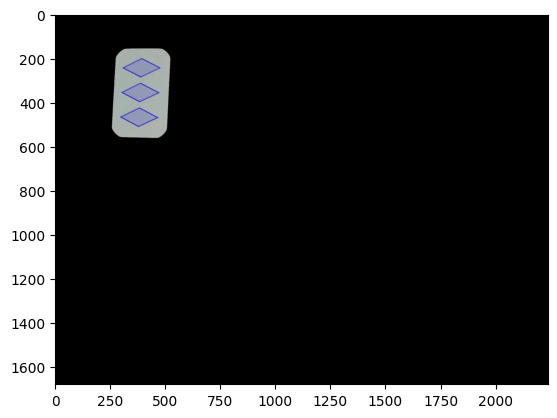

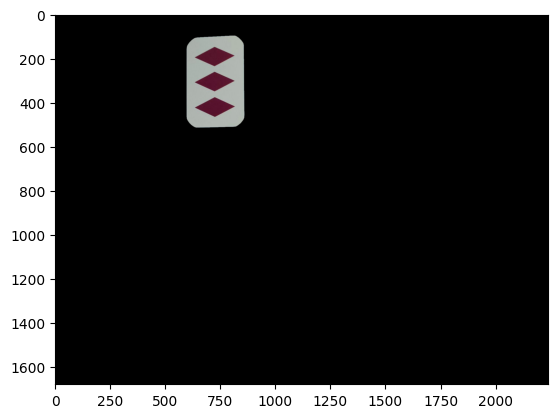

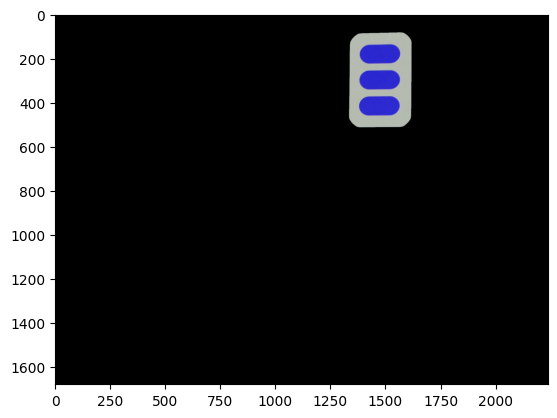

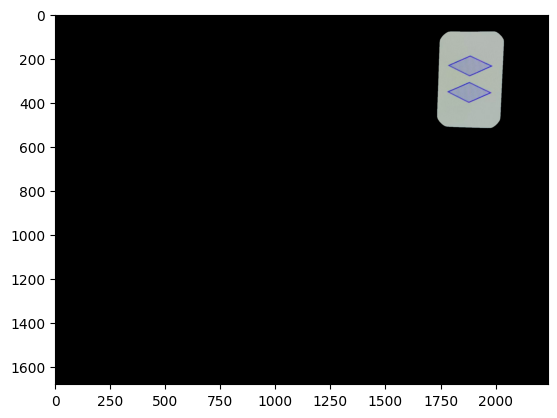

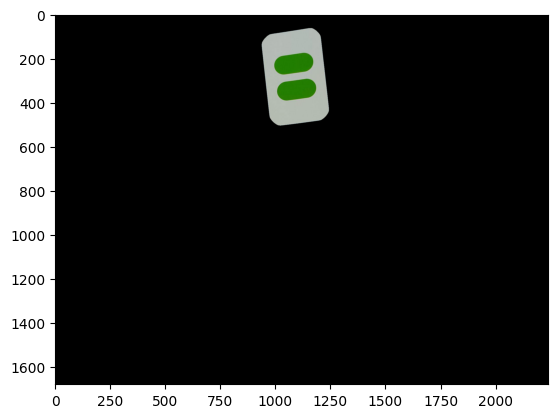

In [9]:
# img = card1.copy()
img = card2.copy()
processed_img = process_image(img)
contours, _ = cv2.findContours(processed_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
masked_imgs = mask_contours(img,contours)

for i in masked_imgs:
    plt.imshow(i,cmap="gray")
    plt.show()
